In [1]:
import random

# Number of individuals in each generation
POPULATION_SIZE = 100

# Valid genes
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generated
TARGET = "I love GeeksforGeeks"

class Individual:
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(cls):
        ''' Create random gene for mutation '''
        return random.choice(GENES)

    @classmethod
    def create_gnome(cls):
        ''' Create chromosome (string of genes) '''
        return [cls.mutated_genes() for _ in range(len(TARGET))]

    def mate(self, par2):
        ''' Perform mating and produce offspring '''
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):
            prob = random.random()
            if prob < 0.45:
                child_chromosome.append(gp1)
            elif prob < 0.90:
                child_chromosome.append(gp2)
            else:
                child_chromosome.append(self.mutated_genes())
        return Individual(child_chromosome)

    def cal_fitness(self):
        ''' Calculate fitness score '''
        return sum(gs != gt for gs, gt in zip(self.chromosome, TARGET))

def main():
    generation = 1
    found = False
    population = [Individual(Individual.create_gnome()) for _ in range(POPULATION_SIZE)]

    while not found:
        # Sort population by fitness (lower is better)
        population.sort(key=lambda x: x.fitness)

        # Print best individual
        print("Generation: {}\tString: {}\tFitness: {}".format(
            generation,
            "".join(population[0].chromosome),
            population[0].fitness))

        # Check if target is reached
        if population[0].fitness == 0:
            found = True
            break

        # Elitism: top 10% move directly
        new_generation = population[:POPULATION_SIZE // 10]

        # Crossover + mutation: remaining 90%
        for _ in range(POPULATION_SIZE - len(new_generation)):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2)
            new_generation.append(child)

        population = new_generation
        generation += 1

    # Final result
    print("\nFinal Result:")
    print("Generation: {}\tString: {}\tFitness: {}".format(
        generation,
        "".join(population[0].chromosome),
        population[0].fitness))

if __name__ == '__main__':
    main()


Generation: 1	String: J-FKguE-}Vsz?KWGRQSM	Fitness: 19
Generation: 2	String: J-FKguE-}Vsz?KWGRQSM	Fitness: 19
Generation: 3	String: : lw3"Nwa$nTM_S
q&.)	Fitness: 18
Generation: 4	String: I lkb kReU
]zgSMxV.)	Fitness: 16
Generation: 5	String: I lkb kReU
]zgSMxV.)	Fitness: 16
Generation: 6	String: I lkb kReU
]zgSMxV.)	Fitness: 16
Generation: 7	String: I ToLz8$%ckj0#rGd;C/	Fitness: 14
Generation: 8	String: I lovtVOApt@QoraqH.G	Fitness: 13
Generation: 9	String: I loHK(9eKkjCorM5kzz	Fitness: 12
Generation: 10	String: I loHK(9eKkjCorM5kzz	Fitness: 12
Generation: 11	String: I love8Gefto0/{G%2rQ	Fitness: 11
Generation: 12	String: I lo]=cGe
kj{orG7r
G	Fitness: 10
Generation: 13	String: I lo]=cGe
kj{orG7r
G	Fitness: 10
Generation: 14	String: I lovejl5ekomor
e2vI	Fitness: 9
Generation: 15	String: I lovejl5ekomor
e2vI	Fitness: 9
Generation: 16	String: I lovejl5ekomor
e2vI	Fitness: 9
Generation: 17	String: I lo&t6GePks$orG7HOs	Fitness: 8
Generation: 18	String: I lo&t6GePks$orG7HOs	Fitness: 8
Genera

In [2]:
'''
| Genetic Algorithm Step | Code Section                              |
|------------------------|-------------------------------------------|
| Initial Population     | `create_gnome()` and population init loop |
| Fitness Function       | `cal_fitness()`                           |
| Selection              | `population[:50]`, `random.choice(...)`   |
| Crossover              | `mate()` method                           |
| Mutation               | Inside `mate()` with 10% chance           |
| Termination            | `if fitness == 0`                         |
| Evolution              | `while not found:` loop                   |
'''

import random

# Number of individuals in each generation
POPULATION_SIZE = 100

# Valid genes
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generated
TARGET = "Sai Tulasi Prasad"

'''
* `POPULATION_SIZE`: how many individuals (guesses) are in each generation.
* `GENES`: list of possible characters that can be used (A-Z, a-z, digits, symbols).
* `TARGET`: the goal string we are trying to evolve (like the perfect DNA).
'''

class Individual:
    def __init__(self, chromosome):  # Takes a string (chromosome) and calculates how "fit" (correct) it is.
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(cls):  # Returns a random character from the allowed set — this is used for mutation.
        ''' Create random gene for mutation '''
        return random.choice(GENES)

    @classmethod
    def create_gnome(cls):  # Creates a random string of the same length as the target — a totally random guess.
        ''' Create chromosome (string of genes) '''
        return [cls.mutated_genes() for _ in range(len(TARGET))]

    '''
    This is where two parents produce a child by combining their genes:

    * With probability:
      * 45%: take from parent 1
      * 45%: take from parent 2
      * 10%: mutate (introduce new gene randomly)
    * Returns a new `Individual` (the child)
    This is the crossover + mutation step!
    '''
    def mate(self, par2):
        ''' Perform mating and produce offspring '''
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):
            prob = random.random()
            if prob < 0.45:
                child_chromosome.append(gp1)
            elif prob < 0.90:
                child_chromosome.append(gp2)
            else:
                child_chromosome.append(self.mutated_genes())
        return Individual(child_chromosome)

    '''
    * Counts how many characters in the guess are different from the target.
    * Lower is better; `0` means perfect match.
    '''
    def cal_fitness(self):
        return sum(gs != gt for gs, gt in zip(self.chromosome, TARGET))


def main():
    generation = 1
    found = False
    population = [Individual(Individual.create_gnome()) for _ in range(POPULATION_SIZE)]  # Creates the first generation — 100 random strings.

    while not found:  # Runs until we find a perfect match.
        # Sort population by fitness (lower is better)
        population.sort(key=lambda x: x.fitness)  # The fittest (closest to target) individuals are at the top.

        # Print best individual
        print("Generation: {}\tString: {}\tFitness: {}".format(
            generation,
            "".join(population[0].chromosome),
            population[0].fitness))  # Shows how good the best guess is in each generation.

        # Check if target is reached
        if population[0].fitness == 0:  # If we found the perfect match, we’re done!
            found = True
            break

        # Elitism: top 10% move directly
        new_generation = population[:POPULATION_SIZE // 10]  # Keep the top 10% directly (elitism)

        # Crossover + mutation: remaining 90%
        '''
        * Pick random pairs from top 50% to mate and produce children
        * Add them to the new generation
        '''
        for _ in range(POPULATION_SIZE - len(new_generation)):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2)
            new_generation.append(child)

        population = new_generation
        generation += 1  # Move to the next generation

    # Final result
    print("\nFinal Result:")
    print("Generation: {}\tString: {}\tFitness: {}".format(
        generation,
        "".join(population[0].chromosome),
        population[0].fitness))

if __name__ == '__main__':
    main()


Generation: 1	String: DBZ[1ElPU[G,;xFax	Fitness: 15
Generation: 2	String: ra3p.F); Tc#aasUH	Fitness: 14
Generation: 3	String: ra3p.F); Tc#aasUH	Fitness: 14
Generation: 4	String: ra3p.F); Tc#aasUH	Fitness: 14
Generation: 5	String: DByJTElPsTGl@aFax	Fitness: 12
Generation: 6	String: DByJTElPsTGl@aFax	Fitness: 12
Generation: 7	String: DByJTElPsTGl@aFax	Fitness: 12
Generation: 8	String: oaiDr#XasG l@a8ax	Fitness: 10
Generation: 9	String: 7aiJZElasG l@aLad	Fitness: 8
Generation: 10	String: 7aiJ:rlasi l@Qsad	Fitness: 7
Generation: 11	String: 7aiJ:rlasi l@Qsad	Fitness: 7
Generation: 12	String: 7aiJ:rlasi l@Qsad	Fitness: 7
Generation: 13	String: Mai[TxlasD O@asad	Fitness: 6
Generation: 14	String: Mai[TxlasD O@asad	Fitness: 6
Generation: 15	String: Mai[TxlasD O@asad	Fitness: 6
Generation: 16	String: Mai[TxlasD O@asad	Fitness: 6
Generation: 17	String: Mai[TElasi l@asad	Fitness: 5
Generation: 18	String: Mai[TElasi l@asad	Fitness: 5
Generation: 19	String: Aai Tclpsi P@asad	Fitness: 4
Generation: 2

Bottlenecks (execution times for each block)

In [3]:
import random
import time

'''
| Genetic Algorithm Step | Code Section                              |
|------------------------|-------------------------------------------|
| Initial Population     | `create_gnome()` and population init loop |
| Fitness Function       | `cal_fitness()`                           |
| Selection              | `population[:50]`, `random.choice(...)`   |
| Crossover              | `mate()` method                           |
| Mutation               | Inside `mate()` with 10% chance           |
| Termination            | `if fitness == 0`                         |
| Evolution              | `while not found:` loop                   |
'''

# Parameters
POPULATION_SIZE = 100
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''
TARGET = "Sai Tulasi Prasad"

class Individual:
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(cls):
        return random.choice(GENES)

    @classmethod
    def create_gnome(cls):
        return [cls.mutated_genes() for _ in range(len(TARGET))]

    def mate(self, par2):
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):
            prob = random.random()
            if prob < 0.45:
                child_chromosome.append(gp1)
            elif prob < 0.90:
                child_chromosome.append(gp2)
            else:
                child_chromosome.append(self.mutated_genes())
        return Individual(child_chromosome)

    def cal_fitness(self):
        return sum(gs != gt for gs, gt in zip(self.chromosome, TARGET))


def main():
    generation = 1
    found = False

    # Initial population generation
    population = [Individual(Individual.create_gnome()) for _ in range(POPULATION_SIZE)]

    while not found:
        print(f"\n--- Generation {generation} ---")

        # 1. Fitness Calculation Timing
        start_fitness = time.time()
        for ind in population:
            ind.fitness = ind.cal_fitness()
        end_fitness = time.time()

        # 2. Sorting Timing
        start_sort = time.time()
        population.sort(key=lambda x: x.fitness)
        end_sort = time.time()

        # Display best candidate of this generation
        print("Best String: {}\tFitness: {}".format(
            "".join(population[0].chromosome),
            population[0].fitness))

        # Termination Check
        if population[0].fitness == 0:
            found = True
            break

        # Elitism: Keep top 10%
        new_generation = population[:POPULATION_SIZE // 10]

        # 3. Mating Timing
        start_mating = time.time()
        for _ in range(POPULATION_SIZE - len(new_generation)):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2)
            new_generation.append(child)
        end_mating = time.time()

        population = new_generation
        generation += 1

        # Report bottleneck timings for this generation
        print("Time - Fitness: {:.8f}s | Sort: {:.8f}s | Mating: {:.8f}s".format(
            end_fitness - start_fitness,
            end_sort - start_sort,
            end_mating - start_mating))

    # Final Result
    print("\n🎉 Final Result:")
    print("Generation: {}\tString: {}\tFitness: {}".format(
        generation,
        "".join(population[0].chromosome),
        population[0].fitness))


if __name__ == '__main__':
    main()



--- Generation 1 ---
Best String: [z"LsXxQs:cAd&s(Q	Fitness: 15
Time - Fitness: 0.00032401s | Sort: 0.00002503s | Mating: 0.00405216s

--- Generation 2 ---
Best String: (oQ TP  0KcXdaPv;	Fitness: 14
Time - Fitness: 0.00033498s | Sort: 0.00002432s | Mating: 0.00092030s

--- Generation 3 ---
Best String: (oQ TP  0KcXdaPv;	Fitness: 14
Time - Fitness: 0.00035620s | Sort: 0.00002313s | Mating: 0.00095963s

--- Generation 4 ---
Best String: Soi xP ;0iGXfa%A;	Fitness: 12
Time - Fitness: 0.00028086s | Sort: 0.00001884s | Mating: 0.00111771s

--- Generation 5 ---
Best String: SaiNBP8;sitb8aNbY	Fitness: 11
Time - Fitness: 0.00031114s | Sort: 0.00001812s | Mating: 0.00103688s

--- Generation 6 ---
Best String: SaiNBP8;sitb8aNbY	Fitness: 11
Time - Fitness: 0.00028372s | Sort: 0.00002217s | Mating: 0.00094891s

--- Generation 7 ---
Best String: SwN rEl&mi :rasR[	Fitness: 9
Time - Fitness: 0.00030518s | Sort: 0.00002122s | Mating: 0.00097227s

--- Generation 8 ---
Best String: SwN rEl&mi :rasR[	Fit


--- Generation 1 ---
Best String: BC1m{jc8C:kb)CJad	Fitness: 15

--- Generation 2 ---
Best String: BC1m{jc8C:kb)CJad	Fitness: 15

--- Generation 3 ---
Best String: B91MT?c8jUktuoJad	Fitness: 14

--- Generation 4 ---
Best String: B91MT?c8jUktuoJad	Fitness: 14

--- Generation 5 ---
Best String: SP [EG%aX: P=@XA#	Fitness: 13

--- Generation 6 ---
Best String: S5ZwX(cQX9kPsa?ad	Fitness: 12

--- Generation 7 ---
Best String: S
1;Tuua],z%"mPad	Fitness: 11

--- Generation 8 ---
Best String: S
1;Tuua],z%"mPad	Fitness: 11

--- Generation 9 ---
Best String: S// TGZaX{UPrrRad	Fitness: 9

--- Generation 10 ---
Best String: SZG T(c8sn (raYad	Fitness: 8

--- Generation 11 ---
Best String: S_8 T=lasCoP.Csad	Fitness: 7

--- Generation 12 ---
Best String: S_8 T=lasCoP.Csad	Fitness: 7

--- Generation 13 ---
Best String: S_8 T=lasCoP.Csad	Fitness: 7

--- Generation 14 ---
Best String: SZ/ TGlas, PrrRad	Fitness: 6

--- Generation 15 ---
Best String: SZ/ TGlas, PrrRad	Fitness: 6

--- Generation 16 ---
Bes

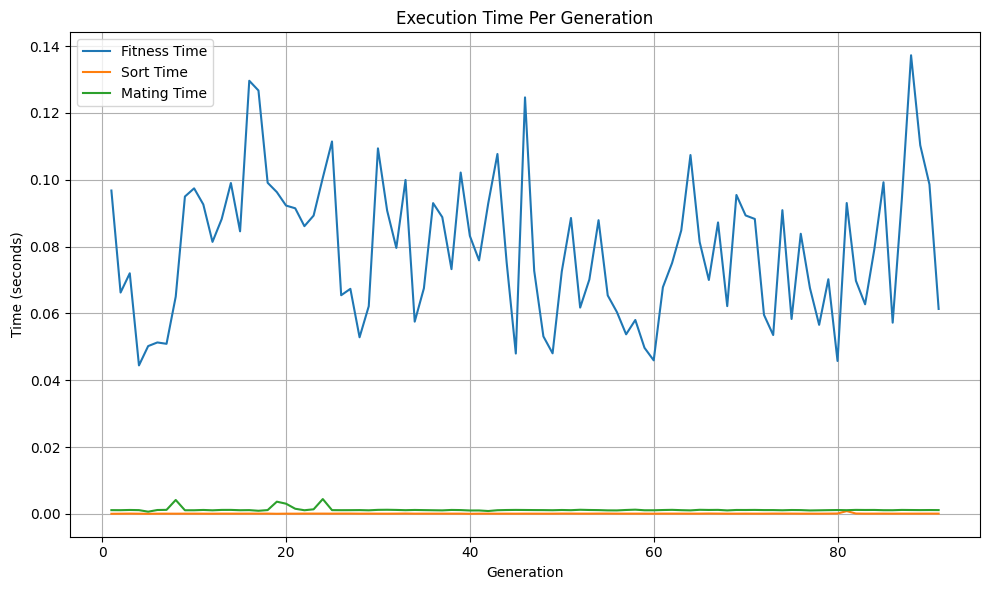

In [4]:
import random
import time
import csv
import multiprocessing as mp
import matplotlib.pyplot as plt

# GA Constants
POPULATION_SIZE = 100
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''
TARGET = "Sai Tulasi Prasad"

class Individual:
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(cls):
        return random.choice(GENES)

    @classmethod
    def create_gnome(cls):
        return [cls.mutated_genes() for _ in range(len(TARGET))]

    def mate(self, par2):
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):
            prob = random.random()
            if prob < 0.45:
                child_chromosome.append(gp1)
            elif prob < 0.90:
                child_chromosome.append(gp2)
            else:
                child_chromosome.append(self.mutated_genes())
        return Individual(child_chromosome)

    def cal_fitness(self):
        return sum(gs != gt for gs, gt in zip(self.chromosome, TARGET))

def compute_fitness_parallel(ind):
    ind.fitness = ind.cal_fitness()
    return ind

def main():
    generation = 1
    found = False

    # Data for plotting
    fitness_times, sort_times, mating_times = [], [], []

    # Initial population
    population = [Individual(Individual.create_gnome()) for _ in range(POPULATION_SIZE)]

    # Open CSV to log times
    with open('/content/drive/MyDrive/AI_ML_GENETIC_ALG/genetic_algorithm_benchmark_0.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Generation", "FitnessTime", "SortTime", "MatingTime"])

        while not found:
            print(f"\n--- Generation {generation} ---")

            # 1. Fitness with multiprocessing
            start_fitness = time.time()
            with mp.Pool() as pool:
                population = pool.map(compute_fitness_parallel, population)
            end_fitness = time.time()

            # 2. Sort by fitness
            start_sort = time.time()
            population.sort(key=lambda x: x.fitness)
            end_sort = time.time()

            # Show best individual
            best = population[0]
            print("Best String: {}\tFitness: {}".format("".join(best.chromosome), best.fitness))

            if best.fitness == 0:
                found = True
                break

            # Elitism
            new_generation = population[:POPULATION_SIZE // 10]

            # 3. Crossover + Mutation
            start_mating = time.time()
            for _ in range(POPULATION_SIZE - len(new_generation)):
                parent1 = random.choice(population[:50])
                parent2 = random.choice(population[:50])
                child = parent1.mate(parent2)
                new_generation.append(child)
            end_mating = time.time()

            # Update for next generation
            population = new_generation
            generation += 1

            # Track times
            fitness_time = end_fitness - start_fitness
            sort_time = end_sort - start_sort
            mating_time = end_mating - start_mating

            fitness_times.append(fitness_time)
            sort_times.append(sort_time)
            mating_times.append(mating_time)

            # Log to CSV
            writer.writerow([generation, fitness_time, sort_time, mating_time])

    # Final result
    print("\n🎉 Final Result:")
    print("Generation: {}\tString: {}\tFitness: {}".format(
        generation, "".join(population[0].chromosome), population[0].fitness))

    # Plot timing chart
    generations = list(range(1, generation))
    plt.figure(figsize=(10, 6))
    plt.plot(generations, fitness_times, label='Fitness Time')
    plt.plot(generations, sort_times, label='Sort Time')
    plt.plot(generations, mating_times, label='Mating Time')
    plt.xlabel('Generation')
    plt.ylabel('Time (seconds)')
    plt.title('Execution Time Per Generation')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/AI_ML_GENETIC_ALG/genetic_algorithm_timing_plot_0.png')
    plt.show()

if __name__ == '__main__':
    main()


Here is the fully updated and optimized Genetic Algorithm code that includes:

✅ Multiprocessing for parallel fitness computation
✅ Execution time logging per generation
✅ Writing performance metrics to a CSV file
✅ Plotting execution time per generation using matplotlib
✅ Saving both CSV and plot as downloadable files


--- Generation 1 ---
Best String: pailHh2wZPwh 7/F#	Fitness: 15

--- Generation 2 ---
Best String: pailHh2wZPwh 7/F#	Fitness: 15

--- Generation 3 ---
Best String: pailHh2wZPwh 7/F#	Fitness: 15

--- Generation 4 ---
Best String: 11.6Oyh(sc r[XYae	Fitness: 14

--- Generation 5 ---
Best String: b{h#:ylzs]e%mas(G	Fitness: 13

--- Generation 6 ---
Best String: b{h#:ylzs]e%mas(G	Fitness: 13

--- Generation 7 ---
Best String: b1.#Oyl(s] %mXsae	Fitness: 12

--- Generation 8 ---
Best String: SRiZe)dDsW HxasL-	Fitness: 11

--- Generation 9 ---
Best String: (ah=:ylKs- hrasAK	Fitness: 10

--- Generation 10 ---
Best String: (ah=:ylKs- hrasAK	Fitness: 10

--- Generation 11 ---
Best String: (ah=:ylKs- hrasAK	Fitness: 10

--- Generation 12 ---
Best String: bax=Dxlasn kr]saG	Fitness: 9

--- Generation 13 ---
Best String: Sai=$bdasW P as:E	Fitness: 8

--- Generation 14 ---
Best String: Sah=!SlDsi Pras=K	Fitness: 7

--- Generation 15 ---
Best String: Sah=!SlDsi Pras=K	Fitness: 7

--- Generation 16 ---


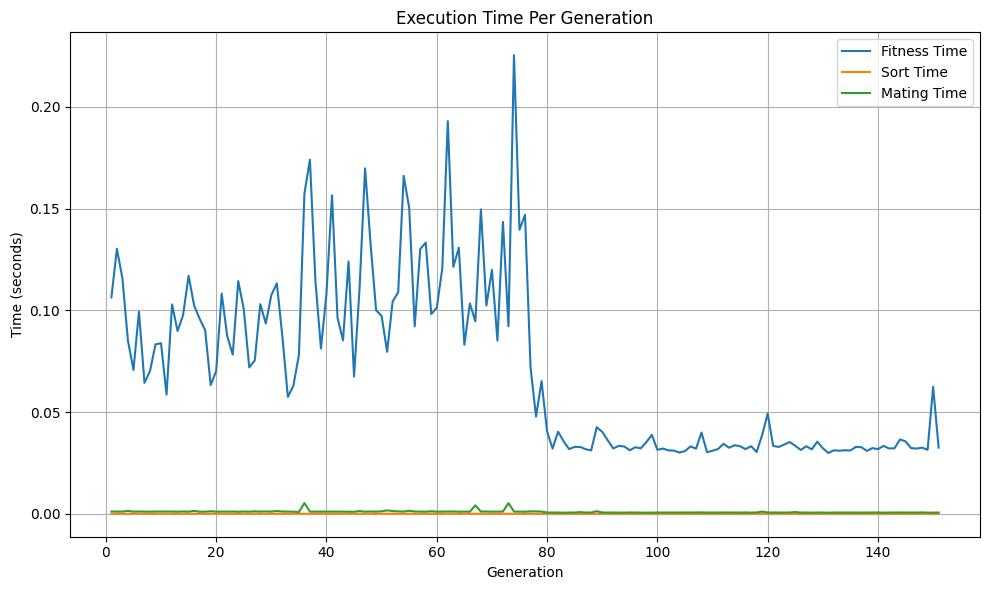


🕒 Total Time Summary:
Total Fitness Time: 10.7553 s
Total Sort Time:    0.0137 s
Total Mating Time:  0.1549 s
Total Generations:  151
Average per Generation (s):
  Fitness: 0.0712
  Sort:    0.0001
  Mating:  0.0010


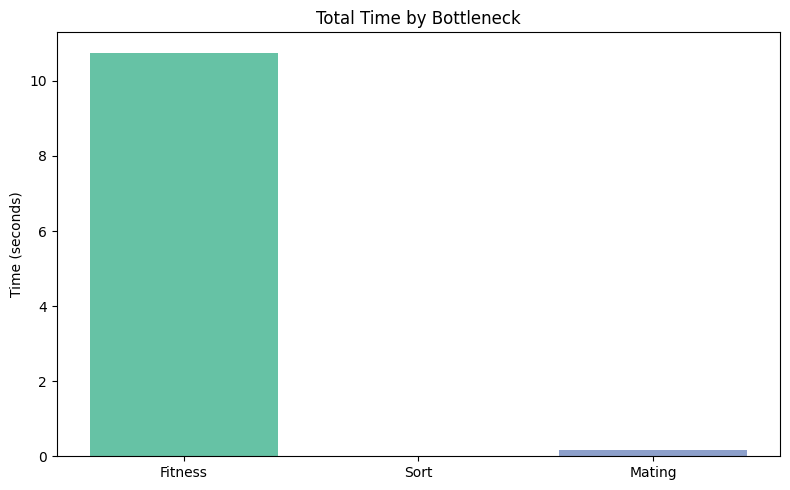

In [5]:
import random
import time
import csv
import multiprocessing as mp
import matplotlib.pyplot as plt

# GA Constants
POPULATION_SIZE = 100
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''
TARGET = "Sai Tulasi Prasad"

class Individual:
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(cls):
        return random.choice(GENES)

    @classmethod
    def create_gnome(cls):
        return [cls.mutated_genes() for _ in range(len(TARGET))]

    def mate(self, par2):
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):
            prob = random.random()
            if prob < 0.45:
                child_chromosome.append(gp1)
            elif prob < 0.90:
                child_chromosome.append(gp2)
            else:
                child_chromosome.append(self.mutated_genes())
        return Individual(child_chromosome)

    def cal_fitness(self):
        return sum(gs != gt for gs, gt in zip(self.chromosome, TARGET))

def compute_fitness_parallel(ind):
    ind.fitness = ind.cal_fitness()
    return ind

def main():
    generation = 1
    found = False

    # Data for plotting
    fitness_times, sort_times, mating_times = [], [], []

    # Initial population
    population = [Individual(Individual.create_gnome()) for _ in range(POPULATION_SIZE)]

    # Open CSV to log times
    with open('/content/drive/MyDrive/AI_ML_GENETIC_ALG/genetic_algorithm_benchmark_1.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Generation", "FitnessTime", "SortTime", "MatingTime"])

        while not found:
            print(f"\n--- Generation {generation} ---")

            # 1. Fitness with multiprocessing
            start_fitness = time.time()
            with mp.Pool() as pool:
                population = pool.map(compute_fitness_parallel, population)
            end_fitness = time.time()

            # 2. Sort by fitness
            start_sort = time.time()
            population.sort(key=lambda x: x.fitness)
            end_sort = time.time()

            # Show best individual
            best = population[0]
            print("Best String: {}\tFitness: {}".format("".join(best.chromosome), best.fitness))

            if best.fitness == 0:
                found = True
                break

            # Elitism
            new_generation = population[:POPULATION_SIZE // 10]

            # 3. Crossover + Mutation
            start_mating = time.time()
            for _ in range(POPULATION_SIZE - len(new_generation)):
                parent1 = random.choice(population[:50])
                parent2 = random.choice(population[:50])
                child = parent1.mate(parent2)
                new_generation.append(child)
            end_mating = time.time()

            # Update for next generation
            population = new_generation
            generation += 1

            # Track times
            fitness_time = end_fitness - start_fitness
            sort_time = end_sort - start_sort
            mating_time = end_mating - start_mating

            fitness_times.append(fitness_time)
            sort_times.append(sort_time)
            mating_times.append(mating_time)

            # Log to CSV
            writer.writerow([generation, fitness_time, sort_time, mating_time])

    # Final result
    print("\n🎉 Final Result:")
    print("Generation: {}\tString: {}\tFitness: {}".format(
        generation, "".join(population[0].chromosome), population[0].fitness))

    # Plot timing chart
    generations = list(range(1, generation))
    plt.figure(figsize=(10, 6))
    plt.plot(generations, fitness_times, label='Fitness Time')
    plt.plot(generations, sort_times, label='Sort Time')
    plt.plot(generations, mating_times, label='Mating Time')
    plt.xlabel('Generation')
    plt.ylabel('Time (seconds)')
    plt.title('Execution Time Per Generation')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/AI_ML_GENETIC_ALG/genetic_algorithm_timing_plot_1.png')
    plt.show()

        # Total time taken for each component
    total_fitness_time = sum(fitness_times)
    total_sort_time = sum(sort_times)
    total_mating_time = sum(mating_times)
    total_generations = generation - 1

    print("\n🕒 Total Time Summary:")
    print(f"Total Fitness Time: {total_fitness_time:.4f} s")
    print(f"Total Sort Time:    {total_sort_time:.4f} s")
    print(f"Total Mating Time:  {total_mating_time:.4f} s")
    print(f"Total Generations:  {total_generations}")
    print(f"Average per Generation (s):")
    print(f"  Fitness: {total_fitness_time/total_generations:.4f}")
    print(f"  Sort:    {total_sort_time/total_generations:.4f}")
    print(f"  Mating:  {total_mating_time/total_generations:.4f}")

    # Optional: Bar chart comparison
    plt.figure(figsize=(8, 5))
    plt.bar(["Fitness", "Sort", "Mating"],
            [total_fitness_time, total_sort_time, total_mating_time],
            color=['#66c2a5', '#fc8d62', '#8da0cb'])
    plt.title("Total Time by Bottleneck")
    plt.ylabel("Time (seconds)")
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/AI_ML_GENETIC_ALG/genetic_algorithm_total_time_bar_1.png')
    plt.show()

if __name__ == '__main__':
    main()



--- Generation 1 ---
Best String: 5fmM{SJDNQ?B7= 0],K HGPV/OaX	Fitness: 25

--- Generation 2 ---
Best String: 5fmM{SJDNQ?B7= 0],K HGPV/OaX	Fitness: 25

--- Generation 3 ---
Best String: "e P[0} 52 /QK];nmJ_0%8L3IaT	Fitness: 24

--- Generation 4 ---
Best String: /$S$7"Zmis s
iyogVV2h9ht[74d	Fitness: 23

--- Generation 5 ---
Best String: /$S$7"Zmis s
iyogVV2h9ht[74d	Fitness: 23

--- Generation 6 ---
Best String: UsiA[mV [. z&{ z#h# I
irj:a0	Fitness: 22

--- Generation 7 ---
Best String: :f-lam8 7kXz{i GVA[.iPiq9 aJ	Fitness: 21

--- Generation 8 ---
Best String: P9-Wam8 Yk BYi&GVuWE/PPD9saT	Fitness: 20

--- Generation 9 ---
Best String: :fFAam8g7?Mf3i R-c?sinPD9saJ	Fitness: 19

--- Generation 10 ---
Best String: :fFAam8g7?Mf3i R-c?sinPD9saJ	Fitness: 19

--- Generation 11 ---
Best String: -f-Wam8 YE B&i&#Vu5qiPPDisad	Fitness: 18

--- Generation 12 ---
Best String: -f-Wam8 YE B&i&#Vu5qiPPDisad	Fitness: 18

--- Generation 13 ---
Best String: mosAam8gHkMf3a TJc?si Pz9sa:	Fitness: 17

--- Gen

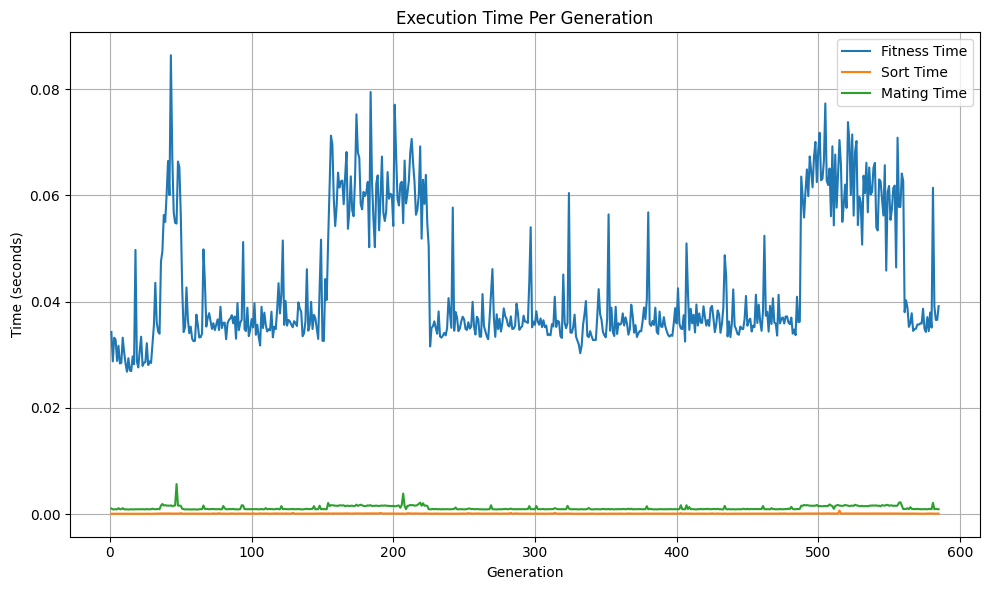


🕒 Total Time Summary:
Total Fitness Time: 25.2790 s
Total Sort Time:    0.0529 s
Total Mating Time:  0.6635 s
Total Generations:  585
Average per Generation (s):
  Fitness: 0.0432
  Sort:    0.0001
  Mating:  0.0011


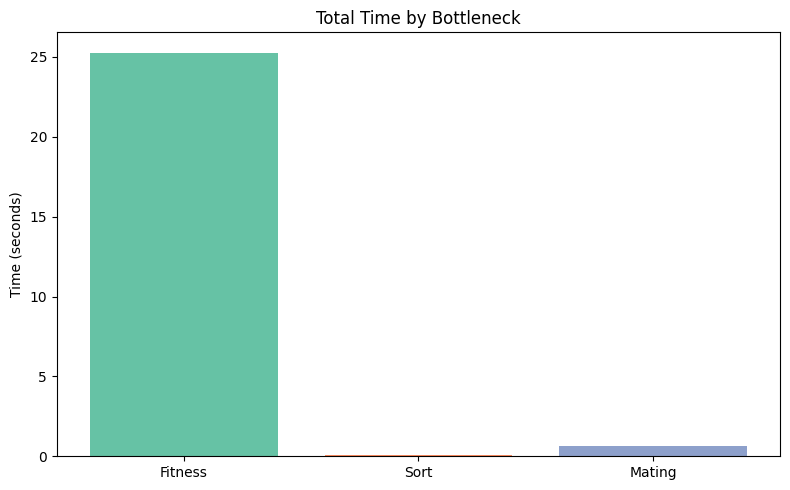

In [6]:
import random
import time
import csv
import multiprocessing as mp
import matplotlib.pyplot as plt

# GA Constants
POPULATION_SIZE = 100
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''
TARGET = "my name is Sai Tulasi Prasad"

class Individual:
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(cls):
        return random.choice(GENES)

    @classmethod
    def create_gnome(cls):
        return [cls.mutated_genes() for _ in range(len(TARGET))]

    def mate(self, par2):
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):
            prob = random.random()
            if prob < 0.45:
                child_chromosome.append(gp1)
            elif prob < 0.90:
                child_chromosome.append(gp2)
            else:
                child_chromosome.append(self.mutated_genes())
        return Individual(child_chromosome)

    def cal_fitness(self):
        return sum(gs != gt for gs, gt in zip(self.chromosome, TARGET))

def compute_fitness_parallel(ind):
    ind.fitness = ind.cal_fitness()
    return ind

def main():
    generation = 1
    found = False

    # Data for plotting
    fitness_times, sort_times, mating_times = [], [], []

    # Initial population
    population = [Individual(Individual.create_gnome()) for _ in range(POPULATION_SIZE)]

    # Open CSV to log times
    with open('/content/drive/MyDrive/AI_ML_GENETIC_ALG/genetic_algorithm_benchmark.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Generation", "FitnessTime", "SortTime", "MatingTime"])

        while not found:
            print(f"\n--- Generation {generation} ---")

            # 1. Fitness with multiprocessing
            start_fitness = time.time()
            with mp.Pool() as pool:
                population = pool.map(compute_fitness_parallel, population)
            end_fitness = time.time()

            # 2. Sort by fitness
            start_sort = time.time()
            population.sort(key=lambda x: x.fitness)
            end_sort = time.time()

            # Show best individual
            best = population[0]
            print("Best String: {}\tFitness: {}".format("".join(best.chromosome), best.fitness))

            if best.fitness == 0:
                found = True
                break

            # Elitism
            new_generation = population[:POPULATION_SIZE // 10]

            # 3. Crossover + Mutation
            start_mating = time.time()
            for _ in range(POPULATION_SIZE - len(new_generation)):
                parent1 = random.choice(population[:50])
                parent2 = random.choice(population[:50])
                child = parent1.mate(parent2)
                new_generation.append(child)
            end_mating = time.time()

            # Update for next generation
            population = new_generation
            generation += 1

            # Track times
            fitness_time = end_fitness - start_fitness
            sort_time = end_sort - start_sort
            mating_time = end_mating - start_mating

            fitness_times.append(fitness_time)
            sort_times.append(sort_time)
            mating_times.append(mating_time)

            # Log to CSV
            writer.writerow([generation, fitness_time, sort_time, mating_time])

    # Final result
    print("\n🎉 Final Result:")
    print("Generation: {}\tString: {}\tFitness: {}".format(
        generation, "".join(population[0].chromosome), population[0].fitness))

    # Plot timing chart
    generations = list(range(1, generation))
    plt.figure(figsize=(10, 6))
    plt.plot(generations, fitness_times, label='Fitness Time')
    plt.plot(generations, sort_times, label='Sort Time')
    plt.plot(generations, mating_times, label='Mating Time')
    plt.xlabel('Generation')
    plt.ylabel('Time (seconds)')
    plt.title('Execution Time Per Generation')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/AI_ML_GENETIC_ALG/genetic_algorithm_timing_plot.png')
    plt.show()

        # Total time taken for each component
    total_fitness_time = sum(fitness_times)
    total_sort_time = sum(sort_times)
    total_mating_time = sum(mating_times)
    total_generations = generation - 1

    print("\n🕒 Total Time Summary:")
    print(f"Total Fitness Time: {total_fitness_time:.4f} s")
    print(f"Total Sort Time:    {total_sort_time:.4f} s")
    print(f"Total Mating Time:  {total_mating_time:.4f} s")
    print(f"Total Generations:  {total_generations}")
    print(f"Average per Generation (s):")
    print(f"  Fitness: {total_fitness_time/total_generations:.4f}")
    print(f"  Sort:    {total_sort_time/total_generations:.4f}")
    print(f"  Mating:  {total_mating_time/total_generations:.4f}")

    # Optional: Bar chart comparison
    plt.figure(figsize=(8, 5))
    plt.bar(["Fitness", "Sort", "Mating"],
            [total_fitness_time, total_sort_time, total_mating_time],
            color=['#66c2a5', '#fc8d62', '#8da0cb'])
    plt.title("Total Time by Bottleneck")
    plt.ylabel("Time (seconds)")
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/AI_ML_GENETIC_ALG/genetic_algorithm_total_time_bar.png')
    plt.show()

if __name__ == '__main__':
    main()


Running: pop_size=50, target='Sai Tulasi Prasad', mutation_prob=0.05
Running: pop_size=50, target='Sai Tulasi Prasad', mutation_prob=0.1
Running: pop_size=100, target='Sai Tulasi Prasad', mutation_prob=0.05
Running: pop_size=100, target='Sai Tulasi Prasad', mutation_prob=0.1


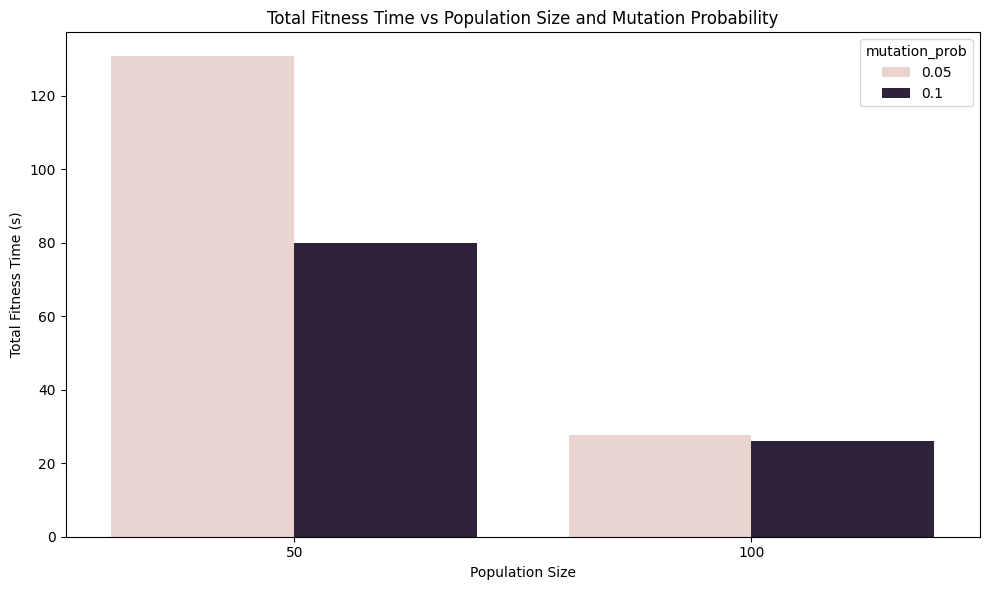

In [7]:
import random
import time
import csv
import multiprocessing as mp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurations (you can add more if needed)
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''
TARGETS = ["Sai Tulasi Prasad"]
POPULATION_SIZES = [50, 100]
MUTATION_PROBS = [0.05, 0.1]

experiment_results = []

class Individual:
    def __init__(self, chromosome, target, mutation_prob):
        self.chromosome = chromosome
        self.target = target
        self.mutation_prob = mutation_prob
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(cls):
        return random.choice(GENES)

    @classmethod
    def create_gnome(cls, target):
        return [cls.mutated_genes() for _ in range(len(target))]

    def mate(self, par2):
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):
            prob = random.random()
            if prob < 0.45:
                child_chromosome.append(gp1)
            elif prob < 0.90:
                child_chromosome.append(gp2)
            else:
                if random.random() < self.mutation_prob:
                    child_chromosome.append(self.mutated_genes())
                else:
                    child_chromosome.append(gp2)
        return Individual(child_chromosome, self.target, self.mutation_prob)

    def cal_fitness(self):
        return sum(gs != gt for gs, gt in zip(self.chromosome, self.target))

def compute_fitness_parallel(ind):
    ind.fitness = ind.cal_fitness()
    return ind

def run_experiment(pop_size, target_str, mutation_prob):
    generation = 1
    found = False
    fitness_times, sort_times, mating_times = [], [], []
    population = [Individual(Individual.create_gnome(target_str), target_str, mutation_prob)
                  for _ in range(pop_size)]

    while not found:
        # 1. Fitness Evaluation
        start_fitness = time.time()
        with mp.Pool() as pool:
            population = pool.map(compute_fitness_parallel, population)
        end_fitness = time.time()

        # 2. Sorting
        start_sort = time.time()
        population.sort(key=lambda x: x.fitness)
        end_sort = time.time()

        if population[0].fitness == 0:
            found = True
            break

        # 3. Mating
        new_generation = population[:pop_size // 10]
        start_mating = time.time()
        for _ in range(pop_size - len(new_generation)):
            p1 = random.choice(population[:50])
            p2 = random.choice(population[:50])
            child = p1.mate(p2)
            new_generation.append(child)
        end_mating = time.time()

        population = new_generation
        generation += 1

        fitness_times.append(end_fitness - start_fitness)
        sort_times.append(end_sort - start_sort)
        mating_times.append(end_mating - start_mating)

    return {
        "pop_size": pop_size,
        "target": target_str,
        "mutation_prob": mutation_prob,
        "generations": generation,
        "total_fitness_time": sum(fitness_times),
        "total_sort_time": sum(sort_times),
        "total_mating_time": sum(mating_times)
    }

# Run Experiments
for pop_size in POPULATION_SIZES:
    for target in TARGETS:
        for mutation in MUTATION_PROBS:
            print(f"Running: pop_size={pop_size}, target='{target}', mutation_prob={mutation}")
            result = run_experiment(pop_size, target, mutation)
            experiment_results.append(result)

# Save and Plot
df = pd.DataFrame(experiment_results)
df.to_csv("genetic_algorithm_experiment_results.csv", index=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="pop_size", y="total_fitness_time", hue="mutation_prob")
plt.title("Total Fitness Time vs Population Size and Mutation Probability")
plt.xlabel("Population Size")
plt.ylabel("Total Fitness Time (s)")
plt.tight_layout()
plt.savefig("genetic_algorithm_fitness_time_plot.png")
plt.show()


Running: pop_size=50, target='Sai Tulasi Prasad', mutation_prob=0.05
Running: pop_size=50, target='Sai Tulasi Prasad', mutation_prob=0.1
Running: pop_size=100, target='Sai Tulasi Prasad', mutation_prob=0.05
Running: pop_size=100, target='Sai Tulasi Prasad', mutation_prob=0.1


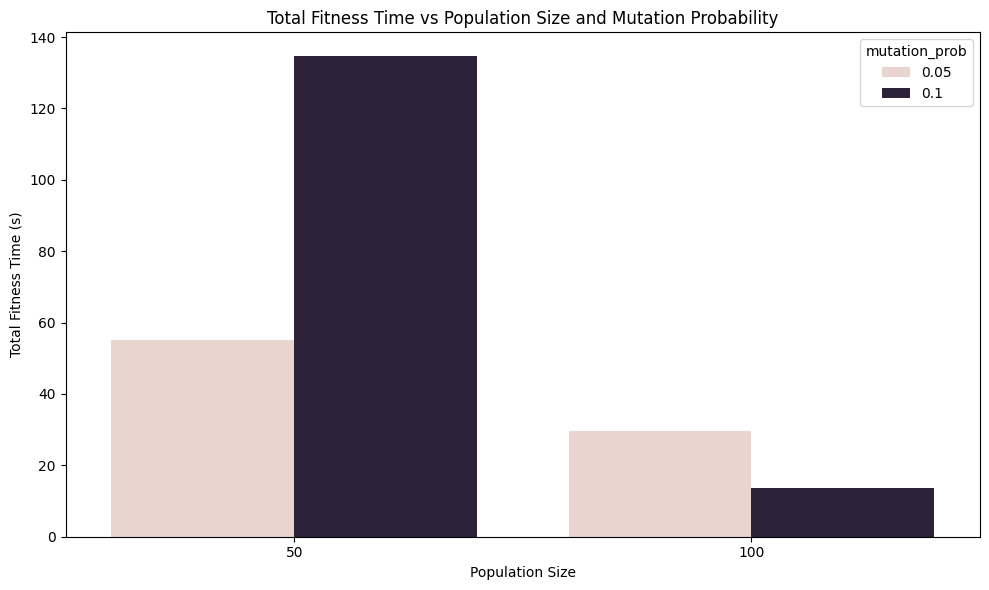

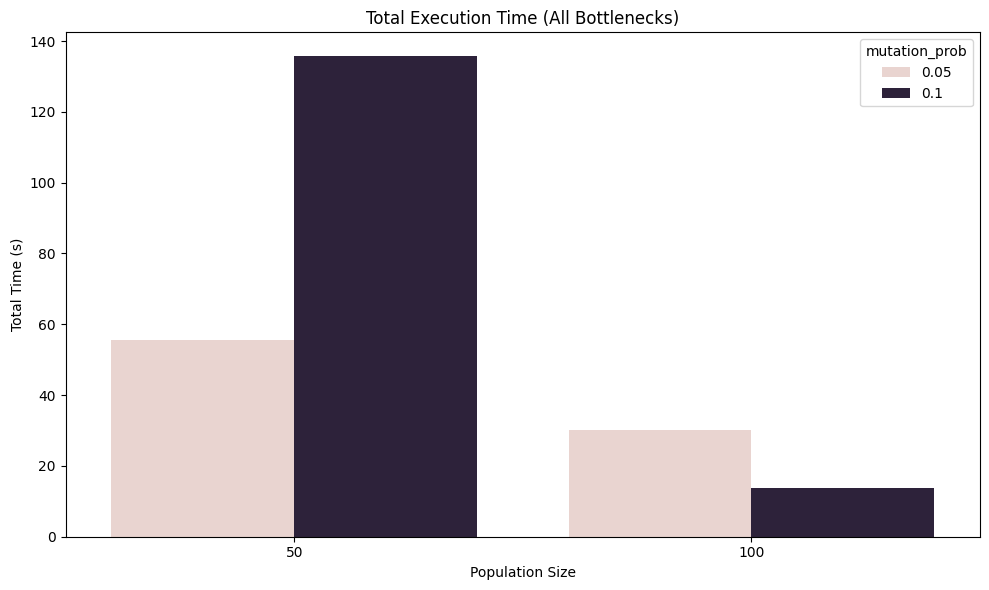

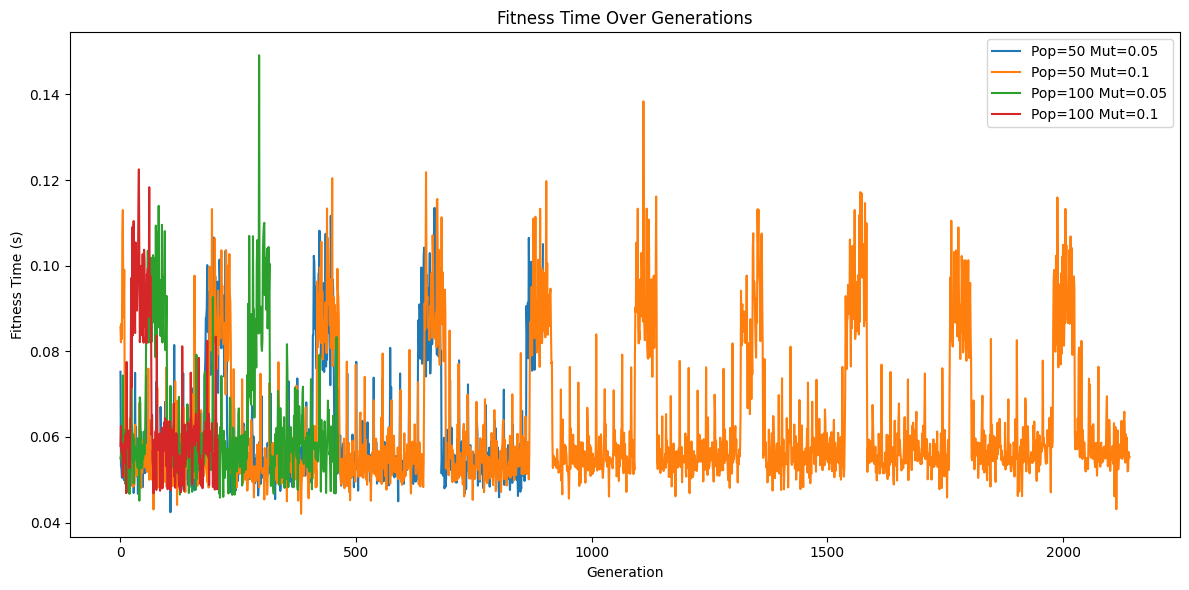

In [8]:
# Genetic Algorithm Bottleneck Benchmarking
# Run in Jupyter Notebook or Google Colab

import random, time, multiprocessing as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurations
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''
TARGETS = ["Sai Tulasi Prasad"]
POPULATION_SIZES = [50, 100]
MUTATION_PROBS = [0.05, 0.1]

experiment_results = []
fitness_time_lines = {}

class Individual:
    def __init__(self, chromosome, target, mutation_prob):
        self.chromosome = chromosome
        self.target = target
        self.mutation_prob = mutation_prob
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(cls):
        return random.choice(GENES)

    @classmethod
    def create_gnome(cls, target):
        return [cls.mutated_genes() for _ in range(len(target))]

    def mate(self, par2):
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):
            prob = random.random()
            if prob < 0.45:
                child_chromosome.append(gp1)
            elif prob < 0.90:
                child_chromosome.append(gp2)
            else:
                if random.random() < self.mutation_prob:
                    child_chromosome.append(self.mutated_genes())
                else:
                    child_chromosome.append(gp2)
        return Individual(child_chromosome, self.target, self.mutation_prob)

    def cal_fitness(self):
        return sum(gs != gt for gs, gt in zip(self.chromosome, self.target))

def compute_fitness_parallel(ind):
    ind.fitness = ind.cal_fitness()
    return ind

def run_experiment(pop_size, target_str, mutation_prob):
    generation = 1
    found = False
    fitness_times, sort_times, mating_times = [], [], []
    population = [Individual(Individual.create_gnome(target_str), target_str, mutation_prob)
                  for _ in range(pop_size)]

    while not found:
        start_fitness = time.time()
        with mp.Pool() as pool:
            population = pool.map(compute_fitness_parallel, population)
        end_fitness = time.time()

        start_sort = time.time()
        population.sort(key=lambda x: x.fitness)
        end_sort = time.time()

        if population[0].fitness == 0:
            found = True
            break

        new_generation = population[:pop_size // 10]
        start_mating = time.time()
        for _ in range(pop_size - len(new_generation)):
            p1 = random.choice(population[:50])
            p2 = random.choice(population[:50])
            child = p1.mate(p2)
            new_generation.append(child)
        end_mating = time.time()

        population = new_generation
        generation += 1

        fitness_times.append(end_fitness - start_fitness)
        sort_times.append(end_sort - start_sort)
        mating_times.append(end_mating - start_mating)

    key = f"Pop={pop_size} Mut={mutation_prob}"
    fitness_time_lines[key] = fitness_times

    return {
        "pop_size": pop_size,
        "target": target_str,
        "mutation_prob": mutation_prob,
        "generations": generation,
        "total_fitness_time": sum(fitness_times),
        "total_sort_time": sum(sort_times),
        "total_mating_time": sum(mating_times),
        "total_time": sum(fitness_times) + sum(sort_times) + sum(mating_times)
    }

# Run Experiments
for pop_size in POPULATION_SIZES:
    for target in TARGETS:
        for mutation in MUTATION_PROBS:
            print(f"Running: pop_size={pop_size}, target='{target}', mutation_prob={mutation}")
            result = run_experiment(pop_size, target, mutation)
            experiment_results.append(result)

# Save + Plot
df = pd.DataFrame(experiment_results)
df.to_csv("genetic_algorithm_experiment_results.csv", index=False)

# Plot 1: Fitness Time vs Pop Size
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="pop_size", y="total_fitness_time", hue="mutation_prob")
plt.title("Total Fitness Time vs Population Size and Mutation Probability")
plt.xlabel("Population Size")
plt.ylabel("Total Fitness Time (s)")
plt.tight_layout()
plt.show()

# Plot 2: Total Time (All Bottlenecks)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="pop_size", y="total_time", hue="mutation_prob")
plt.title("Total Execution Time (All Bottlenecks)")
plt.xlabel("Population Size")
plt.ylabel("Total Time (s)")
plt.tight_layout()
plt.show()

# Plot 3: Line Plot of Fitness Time over Generations
plt.figure(figsize=(12, 6))
for key, times in fitness_time_lines.items():
    plt.plot(range(1, len(times)+1), times, label=key)
plt.xlabel("Generation")
plt.ylabel("Fitness Time (s)")
plt.title("Fitness Time Over Generations")
plt.legend()
plt.tight_layout()
plt.show()
